In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [55]:
# Load the image
image_path = "stone3.jpg"
image = cv2.imread(image_path)

In [56]:
def prev_func():
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use Canny edge detection
    edges = cv2.Canny(blur, 60, 100)

    # Morphological "close" to fill small gaps and reduce background noise
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (6, 6))
    closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    # Find contours
    contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # If no contours found, just exit
    if not contours:
        print("No contours found.")
        exit()

    # Filter out very small contours by area to remove noise
    min_area = 1000  # Adjust this threshold as needed
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

    if not filtered_contours:
        print("No sufficiently large contours found.")
        exit()

    # Select the largest contour by area (likely the slab)
    largest_contour = max(filtered_contours, key=cv2.contourArea)

    # (Optional) Approximate the contour to reduce the number of points
    epsilon = 0.01 * cv2.arcLength(largest_contour, True)
    approx = cv2.approxPolyDP(largest_contour, epsilon, True)

    # Draw the largest (approximated) contour on the original image
    contour_image = image.copy()
    cv2.drawContours(contour_image, [approx], -1, (0, 255, 0), 3)

    # Display the results side-by-side
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title("Edges (After Morphological Closing)")
    plt.imshow(closed, cmap="gray")

    plt.subplot(1, 2, 2)
    plt.title("Largest Contour (Slab)")
    plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))

    plt.tight_layout()
    plt.show()

In [ ]:
def new_func():
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (7, 7), 3)  # Increased kernel for more smoothing

    edges = cv2.Canny(blur, 60, 100)
    # Thresholding instead of Canny
    
    
    # Morphological operations to refine the mask
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
    # kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
    closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
    # opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel)

    # Find contours on the processed binary image
    contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filtered_contours = contours
    # min_area = 10000
    # filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]
    # if not filtered_contours:
    #     print("No sufficiently large contours found.")
    #     exit()

    min_area = 50000  # Adjust based on your image
    filtered_contours = [c for c in contours if cv2.contourArea(c) > min_area]
    largest_contour = max(filtered_contours, key=cv2.contourArea) if filtered_contours else None


    # largest_contour = max(filtered_contours, key=cv2.contourArea)

    epsilon = 0.01 * cv2.arcLength(largest_contour, True)
    approx = cv2.approxPolyDP(largest_contour, epsilon, True)

    contour_image = image.copy()
    cv2.drawContours(contour_image, [approx], -1, (0, 255, 0), 3)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title("Edges (After Morphological Closing)")
    plt.imshow(closed, cmap="gray")

    plt.subplot(1, 2, 2)
    plt.title("Largest Contour (Slab)")
    plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))

    plt.tight_layout()
    plt.show()

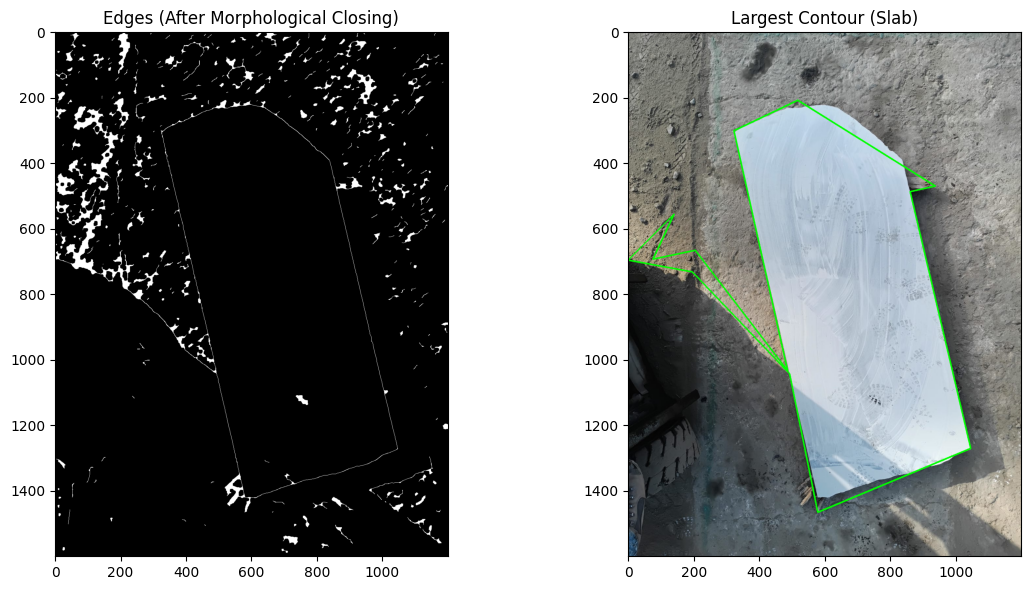

In [58]:
new_func()

In [59]:
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# blur = cv2.GaussianBlur(gray, (5, 5), 0)

# _, threshold = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
# # Draw contours on the original image
# contour_image = image.copy()
# cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# # Display the result
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
# plt.title("Edge Detection")

# plt.subplot(1, 2, 2)
# plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
# plt.title("Detected Contours")

# plt.show()